## EDA (Exploratory Data Analysis) of Images (various fruits)

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os

classes = ( 'cherry', 'strawberry', 'tomato' )

path = os.getcwd()
cherries = path+'/traindata/cherry'
berries = path+'/traindata/strawberry'
toms = path+'/traindata/tomato'

transform = transforms.Compose(
    [ transforms.Resize((300)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

data = datasets.ImageFolder(root='traindata', transform=transform)
data_loader = DataLoader(data, batch_size=4, shuffle=True)

In [47]:
#   num of classes
num_classes = {'Cherries': len(os.listdir(cherries)), 'Strawberries': len(os.listdir(berries)), 'Tomatos': len(os.listdir(toms))}

In [48]:
#   show image fn
def imgshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
from matplotlib.pyplot import imshow

dataiter = iter(data_loader)
images, labels = next(dataiter)

# show images
imgshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Text(0, 0.5, '# of images')

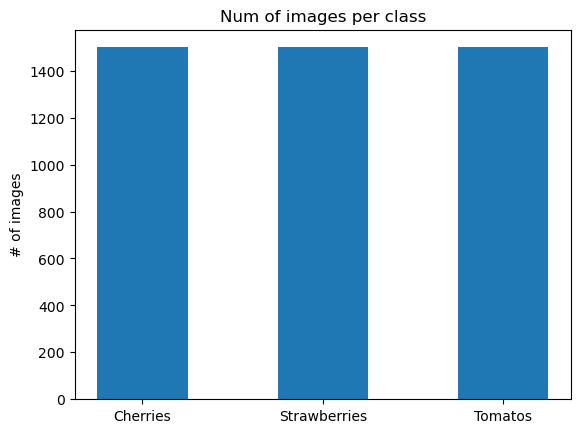

In [50]:
plt.bar(num_classes.keys(), num_classes.values(), width = .5)
plt.title("Num of images per class")
plt.ylabel('# of images')

[                                        ] | 0% Completed | 321.65 us

[########################################] | 100% Completed | 1.22 sms
[########################################] | 100% Completed | 1.12 sms
[########################################] | 100% Completed | 1.22 sms


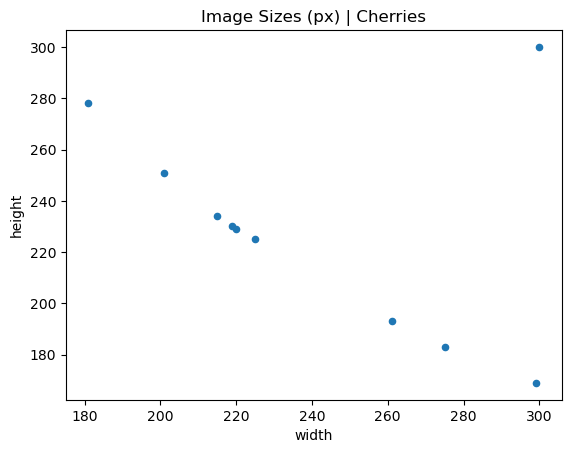

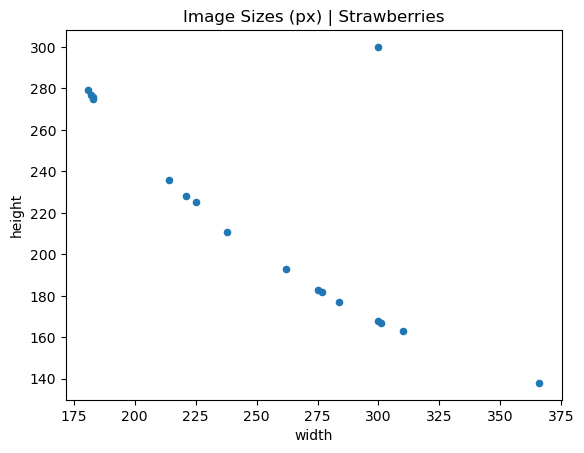

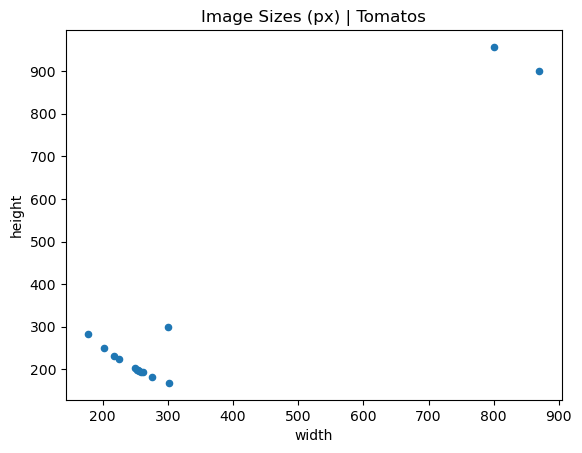

In [68]:
#   Exploring image sizes
import dask
import dask.bag as db
import dask.diagnostics as diagnostics
import pandas as pd
from PIL import Image
df = pd.DataFrame(columns = ['height', 'width'])
dirs = {'Cherries': 'traindata/cherry/',
        'Strawberries': 'traindata/strawberry/',
        'Tomatos': 'traindata/tomato/'}

def get_dimensions(imgfile):
    
    img = Image.open(imgfile)
    arr = np.array(img)
    shape = len(arr.shape)
    if shape==3:
        h,w,d = arr.shape
        return h,w
    if shape==2:
        h,w = arr.shape 
        return h, w
    

for n, d  in dirs.items():
    fpath = d
    flist = [fpath + f for f in os.listdir(fpath)]
    dims = db.from_sequence(flist).map(get_dimensions)

    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns = ['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0: 'count'})
        sizes.plot.scatter(x='width', y='height')
        plt.title('Image Sizes (px) | {}'.format(n))
        df = pd.concat([df, dim_df])

In [72]:
#   display # of pictures per dimension types
df['dims'] = df['height'].astype(str) +'x'+ df['width'].astype(str)
df['dims'].value_counts()

dims
300x300    4440
225x225      21
183x275       3
251x201       3
193x261       2
229x220       2
250x202       1
138x366       1
167x301       1
199x254       1
957x800       1
283x178       1
197x256       1
203x249       1
275x183       1
900x870       1
194x259       1
232x217       1
199x253       1
236x214       1
228x221       1
182x277       1
211x238       1
279x181       1
193x262       1
276x183       1
277x182       1
168x300       1
163x310       1
177x284       1
169x299       1
278x181       1
230x219       1
234x215       1
168x301       1
Name: count, dtype: int64